# 3. 顧客の全体像を把握する10本ノック

顧客データの分析、前処理をする。

| filename | description |
| --- | --- |
| use_log.csv | ジムの利用履歴データ |
| customer_master.csv | 会員データ |
| class_master.csv | 会員区分データ |
| campaign_master.csv | キャンペーン区分データ |


## 3.21. データの読み込み

In [1]:
import pandas as pd

uselog = pd.read_csv("use_log.csv")
print(len(uselog))
uselog.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [2]:
customer = pd.read_csv("customer_master.csv")
print(len(customer))
customer.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [3]:
class_master = pd.read_csv("class_master.csv")
print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


In [4]:
campaign_master = pd.read_csv("campaign_master.csv")
print(len(campaign_master))
campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


## 3.22. 顧客データの整形

In [5]:
customer_join = pd.merge(customer, class_master, on="class", how="left")
customer_join = pd.merge(customer_join, campaign_master, on="campaign_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000,通常


In [6]:
# 欠損値確認
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

end_date は is_deleted == 0 の人が NaN であることから理解できる

## 3.23. 顧客データの基礎集計

In [7]:
# 会員区分ごと
customer_join.groupby("class_name").count()["customer_id"]

class_name
オールタイム    2045
デイタイム     1019
ナイト       1128
Name: customer_id, dtype: int64

([<matplotlib.patches.Wedge at 0x406d9ff220>,
 [Text(0.04203252279701158, 1.0991966462045446, 'オールタイム'),
  Text(-0.8503114660311077, -0.6978326523859633, 'デイタイム'),
  Text(0.7298146268878546, -0.8230252793083223, 'ナイト')],
 [Text(0.022926830616551767, 0.5995618070206606, '48.8%'),
  Text(-0.46380625419878596, -0.38063599221052535, '24.3%'),
  Text(0.39808070557519337, -0.4489228796227212, '26.9%')])

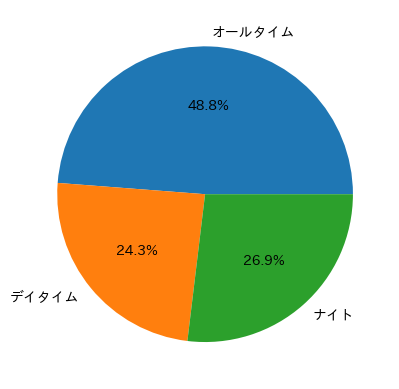

In [21]:
# pie plot
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.pie(customer_join.groupby("class_name").count()["customer_id"], labels=customer_join.groupby("class_name").count().index, autopct="%1.1f%%")

In [8]:
# キャンペーン区分ごと
customer_join.groupby("campaign_name").count()["customer_id"]

campaign_name
入会費半額     650
入会費無料     492
通常       3050
Name: customer_id, dtype: int64

([<matplotlib.patches.Wedge at 0x406da5e5f0>,
 [Text(0.9720495989480061, 0.5148976375795685, '入会費半額'),
  Text(0.2484456471724915, 1.0715758304483365, '入会費無料'),
  Text(-0.721139472217945, -0.8306370215739386, '通常')],
 [Text(0.5302088721534578, 0.2808532568615828, '15.5%'),
  Text(0.1355158075486317, 0.5844959075172744, '11.7%'),
  Text(-0.39334880302797, -0.4530747390403301, '72.8%')])

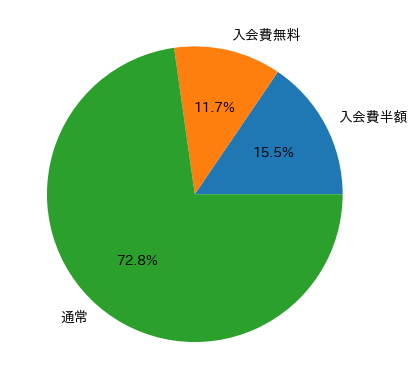

In [22]:
plt.pie(customer_join.groupby("campaign_name").count()["customer_id"], labels=customer_join.groupby("campaign_name").count().index, autopct="%1.1f%%")

In [9]:
# 性別ごと
customer_join.groupby("gender").count()["customer_id"]

gender
F    1983
M    2209
Name: customer_id, dtype: int64

([<matplotlib.patches.Wedge at 0x406de5f7c0>,
 [Text(0.09304232993799022, 1.096057993374306, 'F'),
  Text(-0.09304243255834561, -1.0960579846630496, 'M')],
 [Text(0.050750361784358294, 0.5978498145678032, '47.3%'),
  Text(-0.0507504177590976, -0.5978498098162088, '52.7%')])

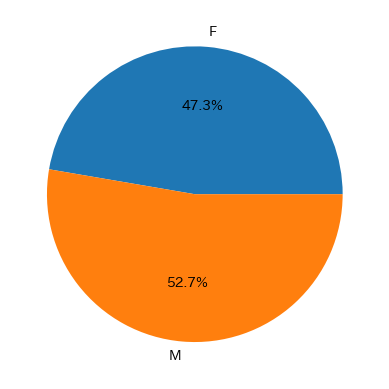

In [25]:
plt.pie(customer_join.groupby("gender").count()["customer_id"], labels=customer_join.groupby("gender").count().index, autopct="%1.1f%%")

In [10]:
# 退会会員の割合
customer_join.groupby("is_deleted").count()["customer_id"]

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

([<matplotlib.patches.Wedge at 0x406de2cc70>,
 [Text(-0.5834392984054928, 0.9325226994964286, '0'),
  Text(0.5834392984054924, -0.9325226994964289, '1')],
 [Text(-0.31823961731208694, 0.5086487451798701, '67.8%'),
  Text(0.31823961731208666, -0.5086487451798702, '32.2%')])

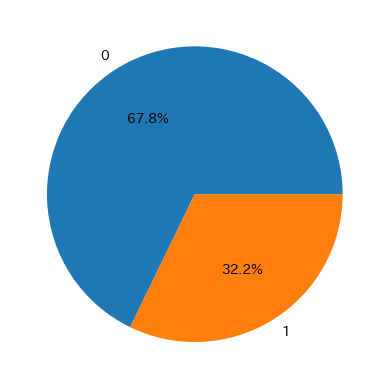

In [24]:
plt.pie(customer_join.groupby("is_deleted").count()["customer_id"], labels=customer_join.groupby("is_deleted").count().index, autopct="%1.1f%%")

In [11]:
# 入会人数を集計してみる
customer_join["start_date"] = pd.to_datetime(customer_join["start_date"])
customer_start = customer_join.loc[customer_join["start_date"] > pd.to_datetime("20180401")]
print(len(customer_start))

1361


退会人数が1350人なので、全体の会員数はあまり変わっていない

## 3.24. 最新顧客データの基礎集計

In [12]:
# 最新月に在籍しているユーザー = 2019/3に退会したユーザー + 在籍しているユーザー
customer_join["end_date"] = pd.to_datetime(customer_join["end_date"])
customer_newer = customer_join.loc[(customer_join["end_date"] >= pd.to_datetime("20190331")) | (customer_join["end_date"].isna())]

print(len(customer_newer))
customer_newer["end_date"].unique()  # 2019/3/31 or NaT

2953


array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [13]:
# 会員区分ごとの集計
customer_newer.groupby("class_name").count()["customer_id"]

class_name
オールタイム    1444
デイタイム      696
ナイト        813
Name: customer_id, dtype: int64

([<matplotlib.patches.Wedge at 0x406b61e3b0>,
 [Text(0.03802559612478202, 1.0993425553663223, 'オールタイム'),
  Text(-0.8613160165513579, -0.6842037120858825, 'デイタイム'),
  Text(0.7135693355527678, -0.8371492121233715, 'ナイト')],
 [Text(0.0207412342498811, 0.5996413938361757, '48.9%'),
  Text(-0.4698087363007406, -0.3732020247741177, '23.6%'),
  Text(0.38921963757423694, -0.4566268429763844, '27.5%')])

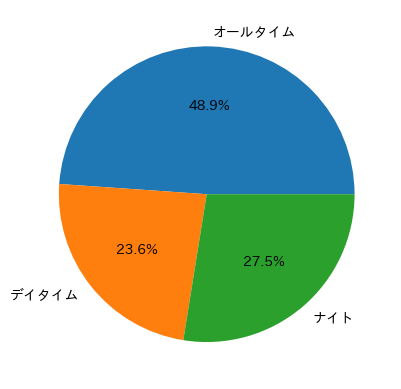

In [17]:
plt.pie(customer_newer.groupby("class_name").count()["customer_id"], labels=customer_newer.groupby("class_name").count().index, autopct="%1.1f%%")

In [15]:
# キャンペーン区分ごとの集計
customer_newer.groupby("campaign_name").count()["customer_id"]

campaign_name
入会費半額     311
入会費無料     242
通常       2400
Name: customer_id, dtype: int64

([<matplotlib.patches.Wedge at 0x406d702170>,
 [Text(1.0403389578524966, 0.3573441657203615, '入会費半額'),
  Text(0.6671203306308039, 0.8746144661844137, '入会費無料'),
  Text(-0.9150633147966294, -0.6104581311715039, '通常')],
 [Text(0.5674576133740891, 0.1949149994838335, '10.5%'),
  Text(0.36388381670771114, 0.47706243610058924, '8.2%'),
  Text(-0.49912544443452506, -0.3329771624571839, '81.3%')])

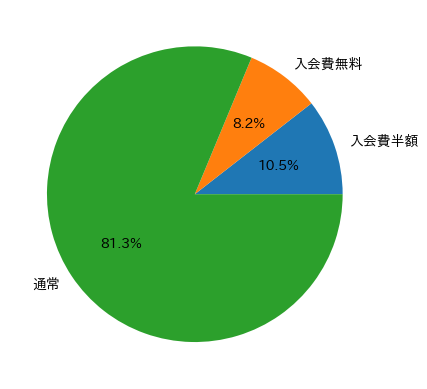

In [18]:
plt.pie(customer_newer.groupby("campaign_name").count()["customer_id"], labels=customer_newer.groupby("campaign_name").count().index, autopct="%1.1f%%")

In [16]:
# 性別ごとの集計
customer_newer.groupby("gender").count()["customer_id"]

gender
F    1400
M    1553
Name: customer_id, dtype: int64

([<matplotlib.patches.Wedge at 0x406deba3e0>,
 [Text(0.08942538609055878, 1.096359019811738, 'F'),
  Text(-0.08942538609055942, -1.096359019811738, 'M')],
 [Text(0.04877748332212297, 0.5980140108064024, '47.4%'),
  Text(-0.04877748332212331, -0.5980140108064024, '52.6%')])

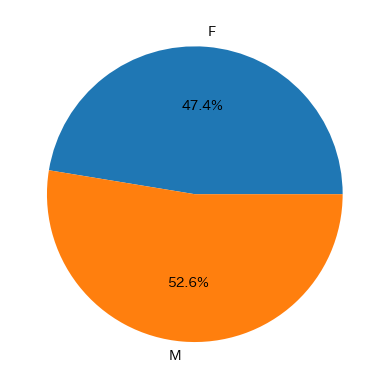

In [26]:
plt.pie(customer_newer.groupby("gender").count()["customer_id"], labels=customer_newer.groupby("gender").count().index, autopct="%1.1f%%")

campaign_name の比率が少し全体傾向と異なる

## 3.25. 利用履歴データの集計

In [28]:
uselog["usedate"] = pd.to_datetime(uselog["usedate"])
uselog["年月"] = uselog["usedate"].dt.strftime("%Y%m")
uselog_months = uselog.groupby(["年月", "customer_id"], as_index=False).count()
uselog_months.rename(columns={"log_id": "count"}, inplace=True)
uselog_months.drop("usedate", axis=1, inplace=True)
uselog_months.head()

,年月,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [29]:
uselog_customer = uselog_months.groupby("customer_id").agg(["mean", "median", "max", "min"])["count"]
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


## 3.26. 利用履歴データから定期利用フラグを作成

In [30]:
# 月 / 曜日別に集計し、最大値が4以上の曜日が1ヶ月でもあったユーザーをフラグ1とする（毎週同じ曜日に利用している = 定期利用）
uselog["weekday"] = uselog["usedate"].dt.weekday
uselog_weekday = uselog.groupby(["customer_id", "年月", "weekday"], as_index=False).count()[["customer_id", "年月", "weekday", "log_id"]]
uselog_weekday.rename(columns={"log_id": "count"}, inplace=True)
uselog_weekday.head()

,customer_id,年月,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


In [31]:
# 顧客ごとの各月の最大値を算出
uselog_weekday = uselog_weekday.groupby("customer_id", as_index=False).max()[["customer_id", "count"]]
uselog_weekday["routine_flag"] = 0
uselog_weekday["routine_flag"] = uselog_weekday["routine_flag"].where(uselog_weekday["count"] < 4, 1)
uselog_weekday.head()

,customer_id,count,routine_flag
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


## 3.27. 顧客データと利用履歴データの結合

In [32]:
customer_join = pd.merge(customer_join, uselog_customer, on="customer_id", how="left")
customer_join = pd.merge(customer_join, uselog_weekday[["customer_id", "routine_flag"]], on="customer_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flag
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1


In [33]:
# 念の為欠損値も確認
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flag        0
dtype: int64

## 3.28. 会員期間の計算

In [34]:
from dateutil.relativedelta import relativedelta

customer_join["calc_date"] = customer_join["end_date"]
customer_join["calc_date"] = customer_join["calc_date"].fillna(pd.to_datetime("20190430"))  # 退会していないユーザーは2019/4/30を退会日とする

customer_join["membership_period"] = 0
for i in range(len(customer_join)):
    delta = relativedelta(customer_join["calc_date"].iloc[i], customer_join["start_date"].iloc[i])
    customer_join["membership_period"].iloc[i] = delta.years * 12 + delta.months

customer_join.head()

/tmp/ipykernel_1032/2379785049.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_join["membership_period"].iloc[i] = delta.years * 12 + delta.months


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flag,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1,2019-04-30,47


## 3.29. 顧客行動の各種統計量を把握する

In [35]:
customer_join[["mean", "median", "max", "min"]].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


- mean列 = 顧客の月内平均利用回数
- この列のmean = 顧客の月内平均利用回数の平均

In [38]:
customer_join.groupby("routine_flag").count()["customer_id"]

routine_flag
0     779
1    3413
Name: customer_id, dtype: int64

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

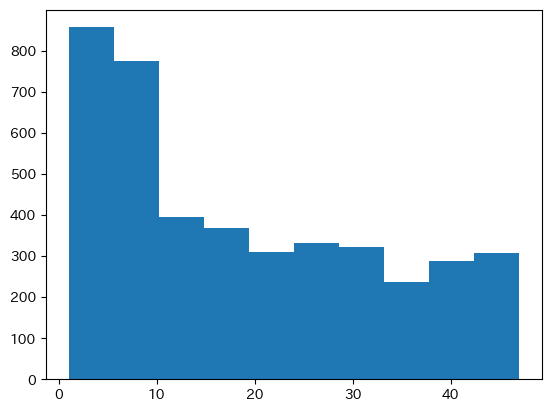

In [40]:
# 会員期間の分布
import matplotlib.pyplot as plt
plt.hist(customer_join["membership_period"])

10ヶ月以上はほぼ横ばい

## 3.30. 退会ユーザーと継続ユーザーの違いを把握

- 月内利用回数の平均値、中央値、最大値、最小値いずれも「退会 < 継続」
- routine_flag の mean に大きな差がある → 定期利用の差が大きい？


In [41]:
# 退会ユーザー
customer_end = customer_join.loc[customer_join["is_deleted"] == 1]
customer_end.describe()

,is_deleted,price,mean,median,max,min,routine_flag,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


In [42]:
# 継続ユーザー
customer_stay = customer_join.loc[customer_join["is_deleted"] == 0]
customer_stay.describe()

,is_deleted,price,mean,median,max,min,routine_flag,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


In [43]:
# csv出力
customer_join.to_csv("customer_join.csv", index=False)